<a href="https://colab.research.google.com/github/SergiiRv/AP-Typing_Neurons/blob/main/Typing_2016_05_19_0004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pyabf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pyabf as af
import pyabf.tools.memtest
import os
import matplotlib.pyplot as plt

from scipy import signal
from scipy import ndimage
from scipy import integrate
from scipy import stats
from scipy.optimize import curve_fit

from ipywidgets import interact
import ipywidgets as widgets
from scipy.signal import argrelextrema

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Neuron Typing processing/PN_SNI'
data_path_out = "/content/drive/MyDrive/Neuron Typing processing/PN_SNI"
outfile = "/content/drive/MyDrive/Neuron Typing processing/PN_SNI/2016_05_19_0004_output.xlsx"

filemane = "2016_05_19_0004.abf"

In [ ]:
abf = af.ABF(os.path.join(data_path, filemane))

SampleRate = abf.sampleRate
print("Sample rate = ", SampleRate)

print(abf.sweepEpochs.__dict__)
for i, p1 in enumerate(abf.sweepEpochs.p1s):
    epochLevel = abf.sweepEpochs.levels[i]
    epochType = abf.sweepEpochs.types[i]
    print(f"epoch index {i}: at point {p1} there is a {epochType} to level {epochLevel}")

print('sweepCount =', abf.__dict__['sweepCount'])
print('sweepPointCount = ', abf.__dict__['sweepPointCount'], '\n',
      'sweepLengthSec = ', abf.__dict__['sweepLengthSec'], '\n',
      'sweepList =', abf.__dict__['sweepList'])

Com, timesL = abf.sweepC, abf.sweepX

File_sweepList = abf.__dict__['sweepList']

Sample rate =  20000
{'p1s': [0, 781, 5781, 15781, 49219], 'p2s': [781, 5781, 15781, 49219, 50000], 'levels': [0.0, 0.0, -20.0, 0.0, 0.0], 'types': ['Step', 'Step', 'Step', 'Step', 'Step'], 'pulseWidths': [0, 0, 0, 0, 0], 'pulsePeriods': [0, 0, 0, 0, 0], 'digitalStates': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]}
epoch index 0: at point 0 there is a Step to level 0.0
epoch index 1: at point 781 there is a Step to level 0.0
epoch index 2: at point 5781 there is a Step to level -20.0
epoch index 3: at point 15781 there is a Step to level 0.0
epoch index 4: at point 49219 there is a Step to level 0.0
sweepCount = 9
sweepPointCount =  50000 
 sweepLengthSec =  2.5 
 sweepList = [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
Vm = pd.DataFrame()
Im = pd.DataFrame()

time_start_lim = abf.sweepEpochs.p1s[2] + 50
time_end_lim = abf.sweepEpochs.p2s[2] - 50

for  i, sweep in enumerate(File_sweepList):
  abf.setSweep(sweepNumber = i)
  Vm[sweep] = abf.sweepY[time_start_lim:time_end_lim]
  Im[sweep] = abf.sweepC[time_start_lim:time_end_lim]


Vm['time'] = timesL[time_start_lim:time_end_lim]
Im['time'] = timesL[time_start_lim:time_end_lim]


In [ ]:
#Vm.set_index('time')
#Im.set_index('time')
Vm

,0,1,2,3,4,5,6,7,8,time
0,-76.300041,-74.041740,-73.022453,-61.199947,-68.389885,-67.120354,-65.319817,-63.415524,-63.037106,0.29155
1,-76.257317,-74.017326,-72.991936,-61.224361,-68.322746,-67.089836,-65.258781,-63.348385,-63.049313,0.29160
2,-76.318352,-74.029533,-72.967522,-61.187740,-68.341057,-67.059319,-65.185539,-63.287350,-62.902828,0.29165
3,-76.300041,-74.053947,-72.943108,-61.138912,-68.261711,-67.004387,-65.155022,-63.244625,-62.854000,0.29170
4,-76.318352,-73.999016,-72.937004,-61.187740,-68.225090,-66.986076,-65.142815,-63.183590,-62.780758,0.29175
...,...,...,...,...,...,...,...,...,...,...
9895,-82.580559,-73.852531,-64.935295,-54.101559,-51.928707,-40.551754,-44.824215,-40.606686,-39.520260,0.78630
9896,-82.525627,-73.858635,-64.935295,-54.138180,-51.977535,-40.490719,-44.781490,-40.588375,-39.550777,0.78635
9897,-82.550041,-73.889153,-64.923088,-54.046627,-51.873775,-40.478512,-44.781490,-40.557858,-39.538570,0.78640
9898,-82.580559,-73.889153,-64.923088,-54.101559,-51.910397,-40.478512,-44.763180,-40.563961,-39.501949,0.78645


## Plotting the Sweeps and have a look at, 
### data are truncoated to the steps aonly

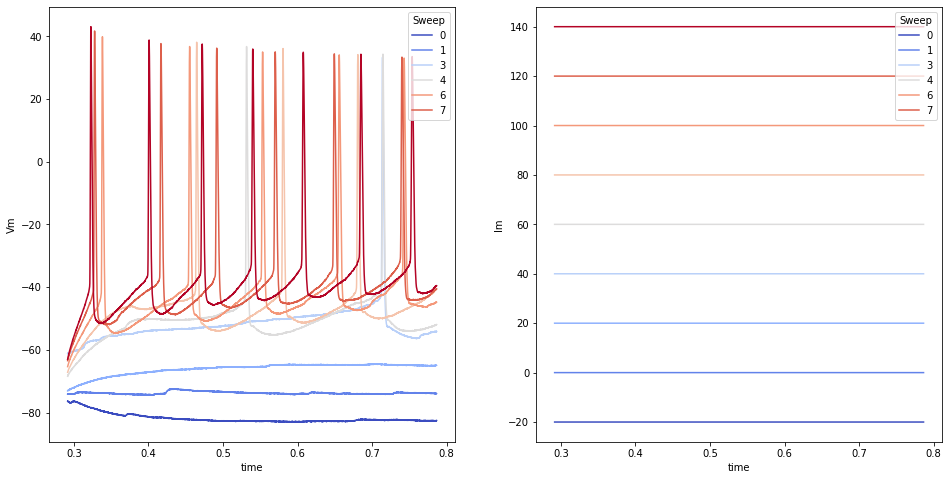

In [ ]:
Vm_long = Vm.melt(id_vars=['time'], value_vars=File_sweepList, var_name='Sweep', value_name='Vm')
Im_long = Im.melt(id_vars=['time'], value_vars=File_sweepList, var_name='Sweep', value_name='Im')

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

#fig.add_subplot(1,2,1)
sns.lineplot(ax=ax[0], data=Vm_long, x="time", y='Vm', hue = 'Sweep', palette = "coolwarm")
#fig.add_subplot(1,2,2)
sns.lineplot(ax=ax[1], data=Im_long, x="time", y='Im', hue = 'Sweep', palette = "coolwarm")
#plt.tight_layout()
plt.show()

## Spanned LOOK

Text(0, 0.5, 'Im, pA')

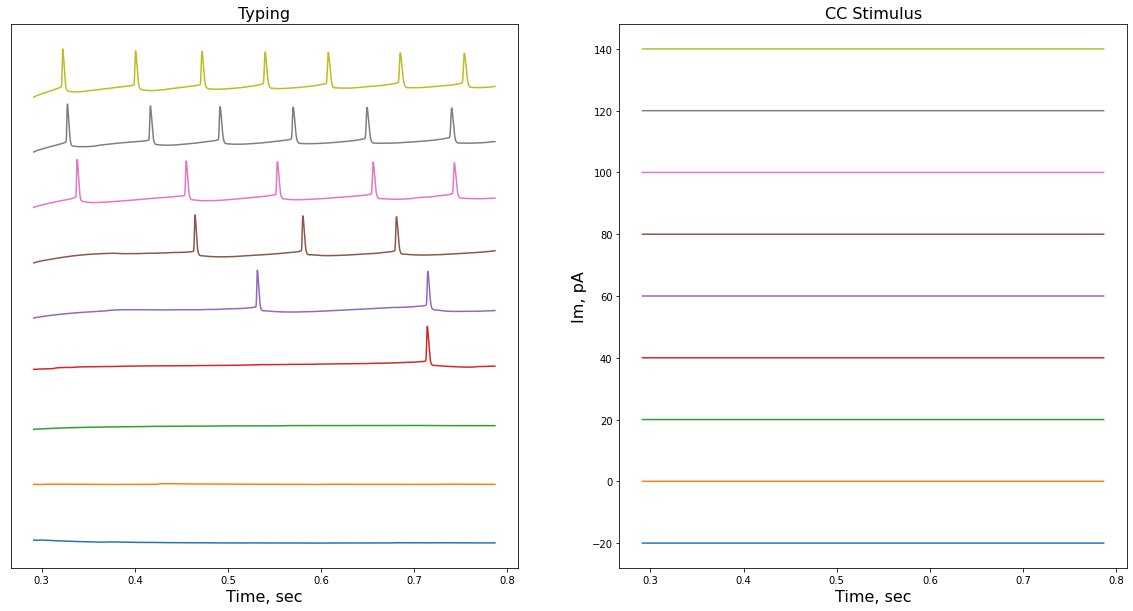

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

for sweepNumber in File_sweepList:
    offset = 120*sweepNumber
    #ax[0].plot(Vm["time"], Vm[sweepNumber]+offset, color='b')
    #ax[1].plot(Im["time"], Im[sweepNumber]+offset, color='k')
    x = Vm["time"]
    yv= Vm[sweepNumber]+offset
    yi= Im[sweepNumber]
    sns.lineplot(ax=ax[0], x=x, y=yv, palette = "coolwarm")
    sns.lineplot(ax=ax[1], x=x, y=yi, palette = "coolwarm")

ax[0].set_xlabel('Time, sec',size=16)
#ax[0].set_ylabel('Vm_shifted, mV',size=16)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Typing',size=16)
ax[1].set_title('CC Stimulus',size=16)
ax[1].set_xlabel('Time, sec',size=16)
ax[1].set_ylabel('Im, pA',size=16)

In [ ]:
from scipy.signal import find_peaks

HEIGHT = 0

N_all = np.array([])
TimePeak_All = np.array([])
PeackHights_All = np.array([])
Sweep_All = np.array([])
AP_idx = np.array([])
Im_All = np.array([])
for sweepNumber in File_sweepList:
  Peak_ix = find_peaks(Vm[sweepNumber], height = HEIGHT)
  Npeak = len(Peak_ix[0])
  TimePeak = Vm['time'][Peak_ix[0]].to_numpy()
  PeackHights = Peak_ix[1]['peak_heights']

  AP_idx = np.append(AP_idx, np.arange(1,Npeak+1,1))
  N_all = np.append(N_all, Npeak)
  TimePeak_All = np.append(TimePeak_All, TimePeak)
  PeackHights_All= np.append(PeackHights_All, PeackHights)
  Sweep_All = np.append(Sweep_All, np.array([sweepNumber]*Npeak))
  Im_All = np.append(Im_All, np.array([Im[sweepNumber][0]]*Npeak))

PeaksOut = pd.DataFrame()
PeaksOut["Sweep"] = Sweep_All
PeaksOut["PeakTime"] = TimePeak_All
PeaksOut['PeakAmp'] = PeackHights_All
PeaksOut['AP_idx'] = AP_idx
PeaksOut['Im_Sweep'] = Im_All

PeaksN = pd.DataFrame(N_all, index = File_sweepList)


# **Finding all Peaks and their number with respect to the stumulus step**

In [ ]:
print("N peaks =>", PeaksN)
PeaksOut.head(50)#, PeaksN, PeaksOut['Sweep'].max(), PeaksOut['PeakTime'][PeaksOut['Sweep'] == PeaksOut['Sweep'].max()]


N peaks =>      0
0  0.0
1  0.0
2  0.0
3  1.0
4  2.0
5  3.0
6  5.0
7  6.0
8  7.0


,Sweep,PeakTime,PeakAmp,AP_idx,Im_Sweep
0,3.0,0.71400,33.270260,1.0,40.0
1,4.0,0.53160,36.706539,1.0,60.0
2,4.0,0.71455,34.283443,2.0,60.0
3,5.0,0.46465,38.092037,1.0,80.0
4,5.0,0.58045,36.071774,2.0,80.0
5,5.0,0.68090,34.136959,3.0,80.0
6,6.0,0.33820,39.837643,1.0,100.0
7,6.0,0.45520,36.718746,2.0,100.0
8,6.0,0.55310,34.991451,3.0,100.0
9,6.0,0.65590,34.051510,4.0,100.0


# ***First peaks in every sweep*** - **Rheobase**
## and corresponding plots

In [ ]:
Rh_df = PeaksOut[PeaksOut['AP_idx'] == 1]

In [ ]:
Rh_df

,Sweep,PeakTime,PeakAmp,AP_idx,Im_Sweep
0,3.0,0.71400,33.270260,1.0,40.0
1,4.0,0.53160,36.706539,1.0,60.0
3,5.0,0.46465,38.092037,1.0,80.0
6,6.0,0.33820,39.837643,1.0,100.0
11,7.0,0.32770,41.662594,1.0,120.0
17,8.0,0.32270,43.048092,1.0,140.0


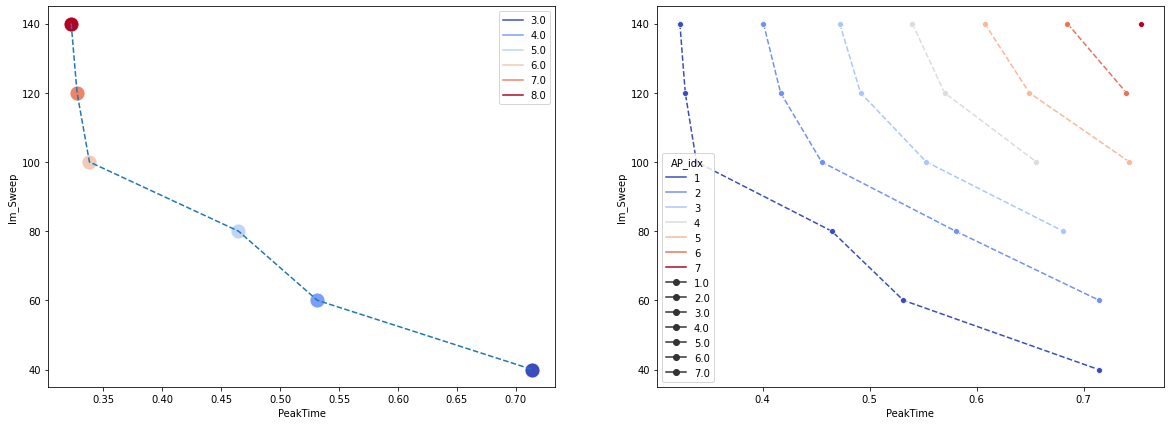

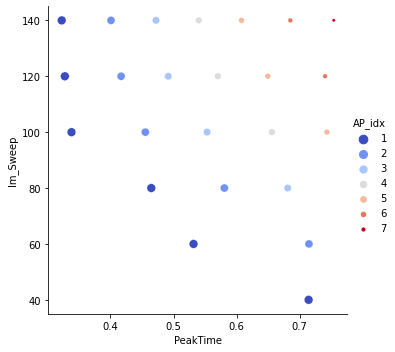

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,7))
sns.color_palette("coolwarm")
sns.lineplot(ax=ax[0],
    data=Rh_df,
    x="PeakTime", y="Im_Sweep", hue = "Sweep", palette="coolwarm", marker = "o", ms=15,
     sizes=(10,30),
    markers=True, dashes=True)#style="AP_idx",size="AP_idx",
sns.lineplot(ax=ax[0],
    data=Rh_df,
    x="PeakTime", y="Im_Sweep", linestyle = '--', color = 'C0', 
    markers=False, dashes=True)

sns.lineplot(ax=ax[1],
    data=PeaksOut,
    x="PeakTime", y="Im_Sweep", hue="AP_idx", style="AP_idx", palette="coolwarm", linestyle = '--',
    markers=["o"]*int(PeaksOut["AP_idx"].max()), dashes=False)

sns.relplot(
    data=PeaksOut,
    x="PeakTime", y="Im_Sweep", hue="AP_idx", palette="coolwarm",
    size="AP_idx", sizes=(75, 10), linestyle = '--', markers = ["o"]*len(File_sweepList), dashes = (5, 2))

In [ ]:
dV_dt = pd.DataFrame(np.array([(np.diff(Vm[i])/np.diff(Vm["time"])) for i in File_sweepList]).T, columns = File_sweepList)

In [ ]:
dV_dt

,0,1,2,3,4,5,6,7,8
0,854.492188,488.281250,610.351563,-488.281250,1342.773438,610.351563,1220.703125,1342.773438,-244.140625
1,-1220.703125,-244.140625,488.281250,732.421875,-366.210938,610.351563,1464.843750,1220.703125,2929.687500
2,366.210938,-488.281250,488.281250,976.562500,1586.914063,1098.632813,610.351563,854.492188,976.562500
3,-366.210938,1098.632813,122.070313,-976.562500,732.421875,366.210938,244.140625,1220.703125,1464.843750
4,-1464.843750,-488.281250,610.351563,1220.703125,-854.492188,122.070313,2441.406250,1342.773438,1708.984375
...,...,...,...,...,...,...,...,...,...
9894,-854.492188,-488.281250,0.000000,-122.070313,0.000000,-732.421875,0.000000,-610.351563,122.070313
9895,1098.632813,-122.070313,0.000000,-732.421875,-976.562500,1220.703125,854.492188,366.210938,-610.351563
9896,-488.281250,-610.351563,244.140625,1831.054688,2075.195313,244.140625,0.000000,610.351563,244.140625
9897,-610.351563,0.000000,0.000000,-1098.632813,-732.421875,0.000000,366.210938,-122.070313,732.421875


## **APs , derivatives and Phase plots**

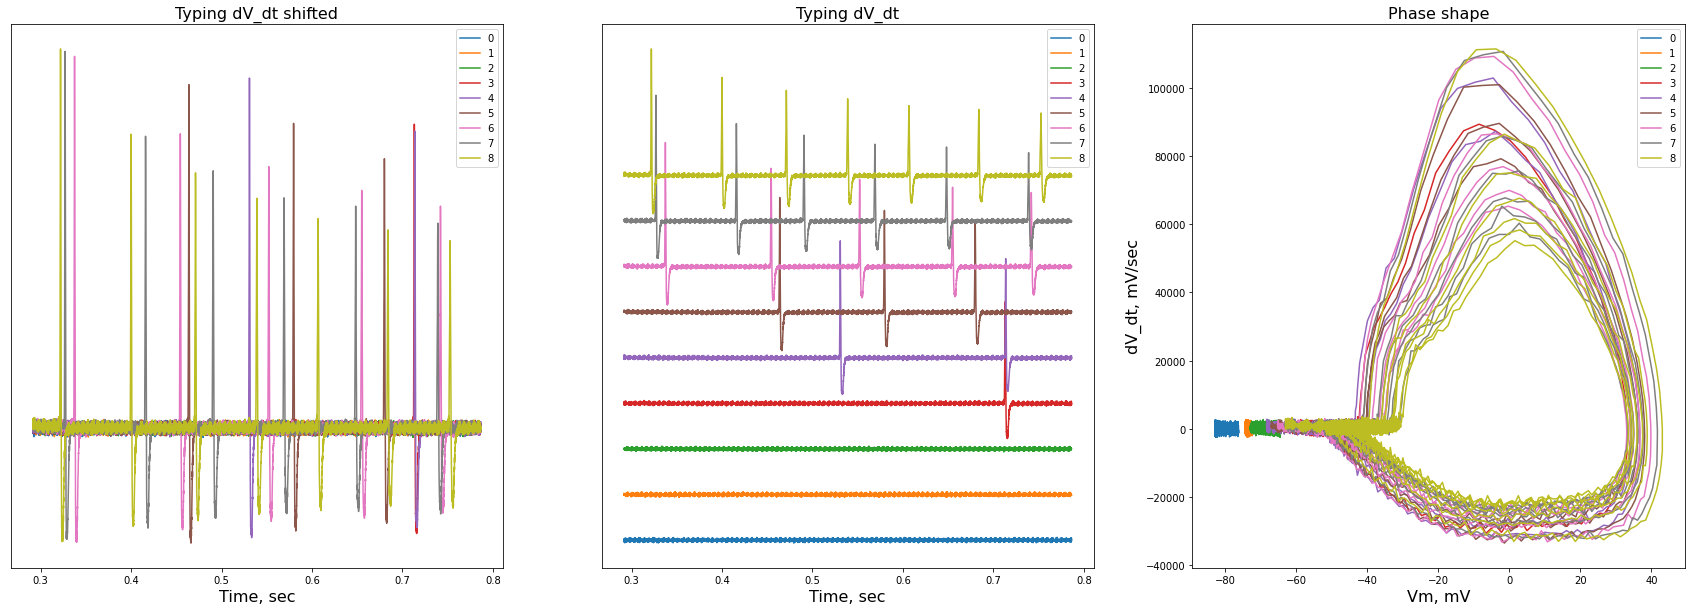

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(30,10))

for sweepNumber in File_sweepList:
    offset = 40000*sweepNumber
    #ax[0].plot(Vm["time"], Vm[sweepNumber]+offset, color='b')
    #ax[1].plot(Im["time"], Im[sweepNumber]+offset, color='k')
    x = Vm["time"][:-1]
    yv= Vm[sweepNumber][:-1]
    ydvoff= dV_dt[sweepNumber]+offset
    ydv= dV_dt[sweepNumber]
    sns.lineplot(ax=ax[0], x=x, y=ydv, palette = "coolwarm", legend= 'full', label=sweepNumber)
    sns.lineplot(ax=ax[1], x=x, y=ydvoff, palette = "coolwarm", legend= 'full', label=sweepNumber)
    ax[2].plot(yv, ydv, label=sweepNumber)

ax[0].set_xlabel('Time, sec',size=16)
#ax[0].set_ylabel('Vm_shifted, mV',size=16)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Typing dV_dt shifted',size=16)
ax[0].legend( loc="best")

ax[1].set_xlabel('Time, sec',size=16)
#ax[1].set_ylabel('Vm_shifted, mV',size=16)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Typing dV_dt',size=16)
ax[1].legend(loc="best")

ax[2].set_title('Phase shape',size=16)
ax[2].set_xlabel('Vm, mV',size=16)
ax[2].set_ylabel('dV_dt, mV/sec',size=16)
ax[2].legend(loc="best")

In [ ]:
print(np.diff(PeaksOut['PeakTime'][PeaksOut['Sweep'] == PeaksOut['Sweep'].max()]).min()/3)
Span = int((np.diff(PeaksOut['PeakTime'][PeaksOut['Sweep'] == PeaksOut['Sweep'].max()]).min()/3)*SampleRate)
print("Span=", Span)

0.022583333333333327
Span= 451


<ipython-input-156-9ebca848dc2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rh_df['startpoint'] = np.int_((Rh_df.loc[:,'PeakTime']-Vm.loc[0,'time']).to_numpy()*SampleRate)-Span
<ipython-input-156-9ebca848dc2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rh_df['endpoint'] = np.int_((Rh_df.loc[:,'PeakTime']-Vm.loc[0,'time']).to_numpy()*SampleRate)+Span
<ipython-input-156-9ebca848dc2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

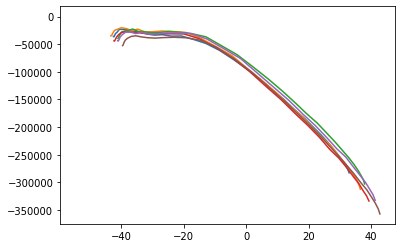

In [ ]:
Rh_df['startpoint'] = np.int_((Rh_df.loc[:,'PeakTime']-Vm.loc[0,'time']).to_numpy()*SampleRate)-Span
Rh_df['endpoint'] = np.int_((Rh_df.loc[:,'PeakTime']-Vm.loc[0,'time']).to_numpy()*SampleRate)+Span

VmONE = pd.DataFrame()
dV_dtONE = pd.DataFrame()
for sweepNumber in Rh_df['Sweep'].to_numpy():
  x1=int(Rh_df.loc[Rh_df['Sweep']==sweepNumber,'startpoint'])
  x2=int(Rh_df.loc[Rh_df['Sweep']==sweepNumber,'endpoint'])
  VmONE[sweepNumber] = Vm[sweepNumber][x1:x2].reset_index(drop=True).to_numpy()
  dV_dtONE[sweepNumber] = dV_dt[sweepNumber][x1:x2].reset_index(drop=True).to_numpy()

Rh_df['InOutDiff_sec']=(dV_dtONE.idxmax().to_numpy() - dV_dtONE.idxmin().to_numpy())*(1/SampleRate)

CutTh = 2000 # Thershold o take the only positive part !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
AddKoef = 1.7 # reinforcing the coeficient to make the curve dropfaster !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

dV_dtONEplus= dV_dtONE[dV_dtONE>CutTh]
VmONEplus = VmONE[dV_dtONE>CutTh]
Rh_df['shift'] = VmONEplus.min().to_numpy()
Rh_df['b'] = dV_dtONEplus.min().to_numpy()
Rh_df['Koef'] = (dV_dtONEplus.max().to_numpy() - dV_dtONEplus.min().to_numpy())/([VmONEplus.loc[index,sweep] for index,sweep  in list(zip(dV_dtONEplus.idxmax().to_numpy(), dV_dtONEplus.idxmax().index.to_numpy()))]-VmONEplus.min().to_numpy())*AddKoef

dV_dtONElow = pd.DataFrame()

for sweepNumber in Rh_df['Sweep']:
  b=Rh_df.loc[Rh_df['Sweep']==sweepNumber, 'b'].to_numpy()
  sh=Rh_df.loc[Rh_df['Sweep']==sweepNumber, 'shift'].to_numpy()
  k=Rh_df.loc[Rh_df['Sweep']==sweepNumber, 'Koef'].to_numpy()
  dV_dtONElow[sweepNumber] = (VmONEplus[sweepNumber]-sh)*k+b

aa = dV_dtONEplus - dV_dtONElow
Rh_df['KinkVm']=[VmONEplus.loc[index,sweep] for index,sweep  in list(zip(aa.dropna().idxmax().to_numpy(), aa.dropna().idxmax().index.to_numpy()))]
Rh_df['KinkVmIdx']=aa.dropna().idxmax().to_numpy()
plt.plot(VmONEplus,aa)

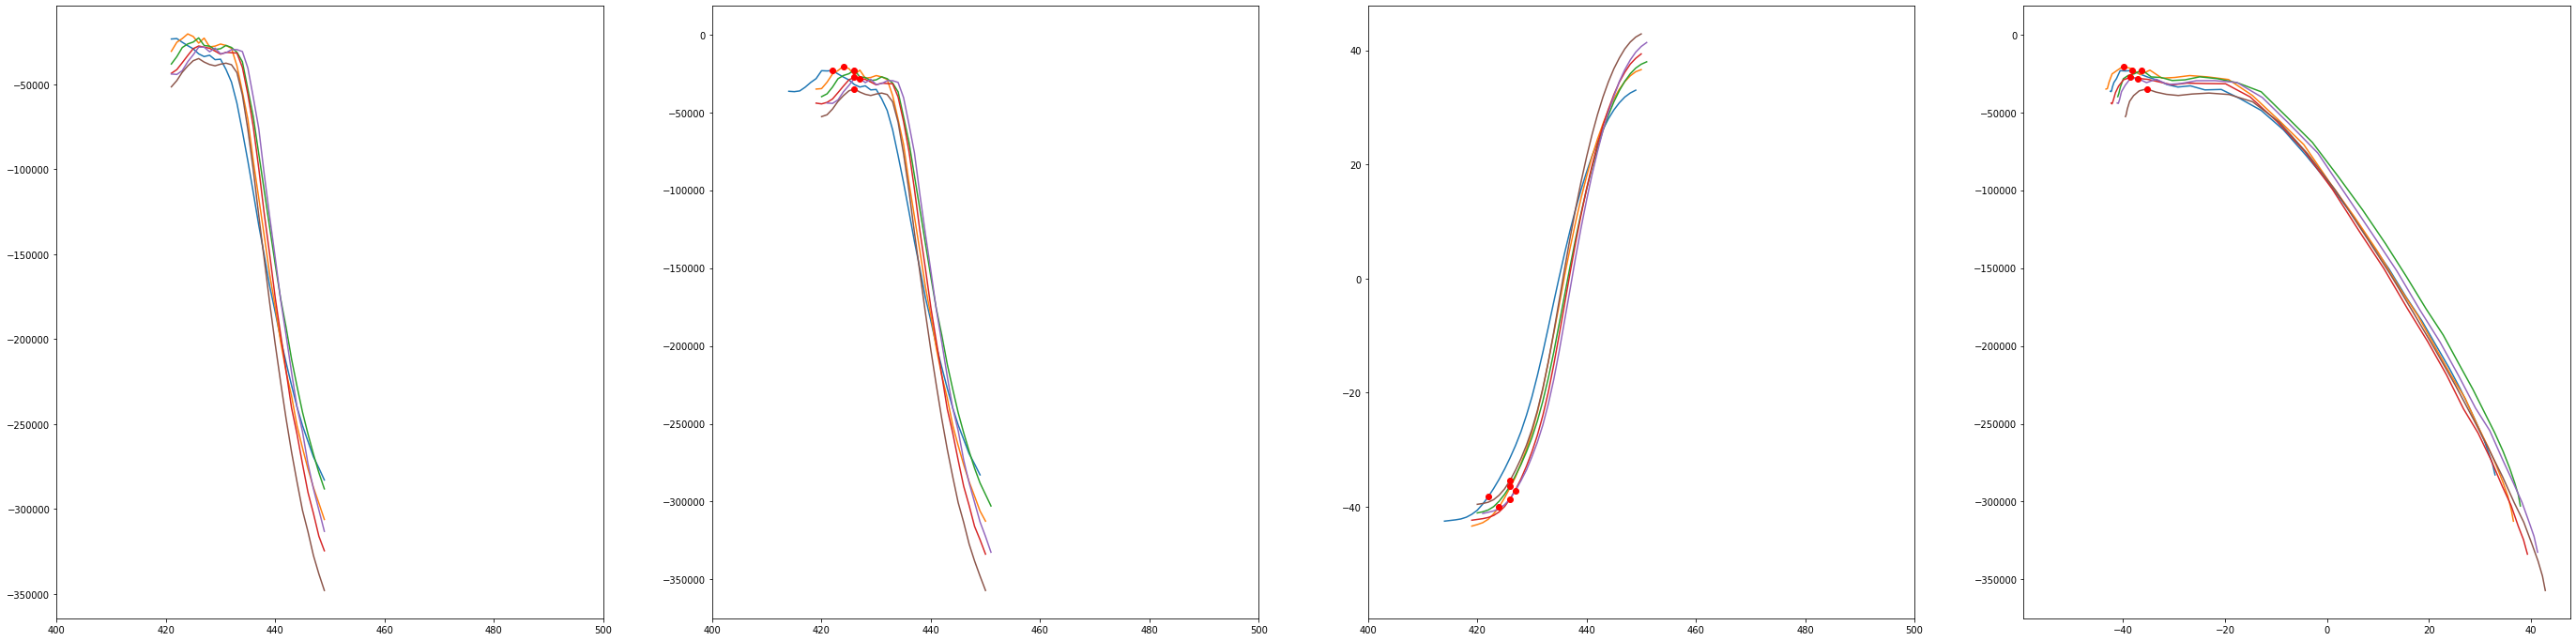

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(48,12))
ax[0].plot(aa.dropna())
ax[0].set_xlim(400, 500)
ax[1].plot(aa)
ax[1].plot(aa.dropna().idxmax(axis=0), aa.dropna().max(axis=0), 'ro')
ax[1].set_xlim(400, 500)
#print(aa.dropna().idxmax(axis=0), aa.dropna().max(axis=0))
ax[2].plot(VmONEplus)
ax[2].plot(aa.dropna().idxmax(axis=0), [VmONEplus.loc[index,sweep] for index,sweep  in list(zip(aa.dropna().idxmax().to_numpy(), aa.dropna().idxmax().index.to_numpy()))], 'ro')
ax[2].set_xlim(400, 500)
ax[3].plot(VmONEplus,aa)
ax[3].plot([VmONEplus.loc[index,sweep] for index,sweep  in list(zip(aa.dropna().idxmax().to_numpy(), aa.dropna().idxmax().index.to_numpy()))], aa.dropna().max(), 'ro')
#aa.dropna()

In [ ]:
 #(dV_dtONEplus.max().to_numpy() - dV_dtONEplus.min().to_numpy())/([VmONEplus.loc[index,sweep] for index,sweep  in list(zip(dV_dtONEplus.idxmax().to_numpy(), dV_dtONEplus.idxmax().index.to_numpy()))]-VmONEplus.min().to_numpy())
 #[VmONEplus.loc[index,sweep] for index,sweep  in list(zip(dV_dtONEplus.idxmax().to_numpy(), dV_dtONEplus.idxmax().index.to_numpy()))]
 #[[index,sweep] for index,sweep in list(zip(dV_dtONEplus.idxmax().to_numpy(), dV_dtONEplus.idxmax().index.to_numpy()))]
#list(zip(dV_dtONEplus.idxmax().to_numpy(), dV_dtONEplus.idxmax().index.to_numpy()))

## Comaprison of first APs and their phases
### and
# Search for **AP-kink position - moment of axon hillok excitation** - *red dot*
### and
## **InOutDiff_sec **- time between max inward ad outward currents - *change of excitation depend on stimulus *

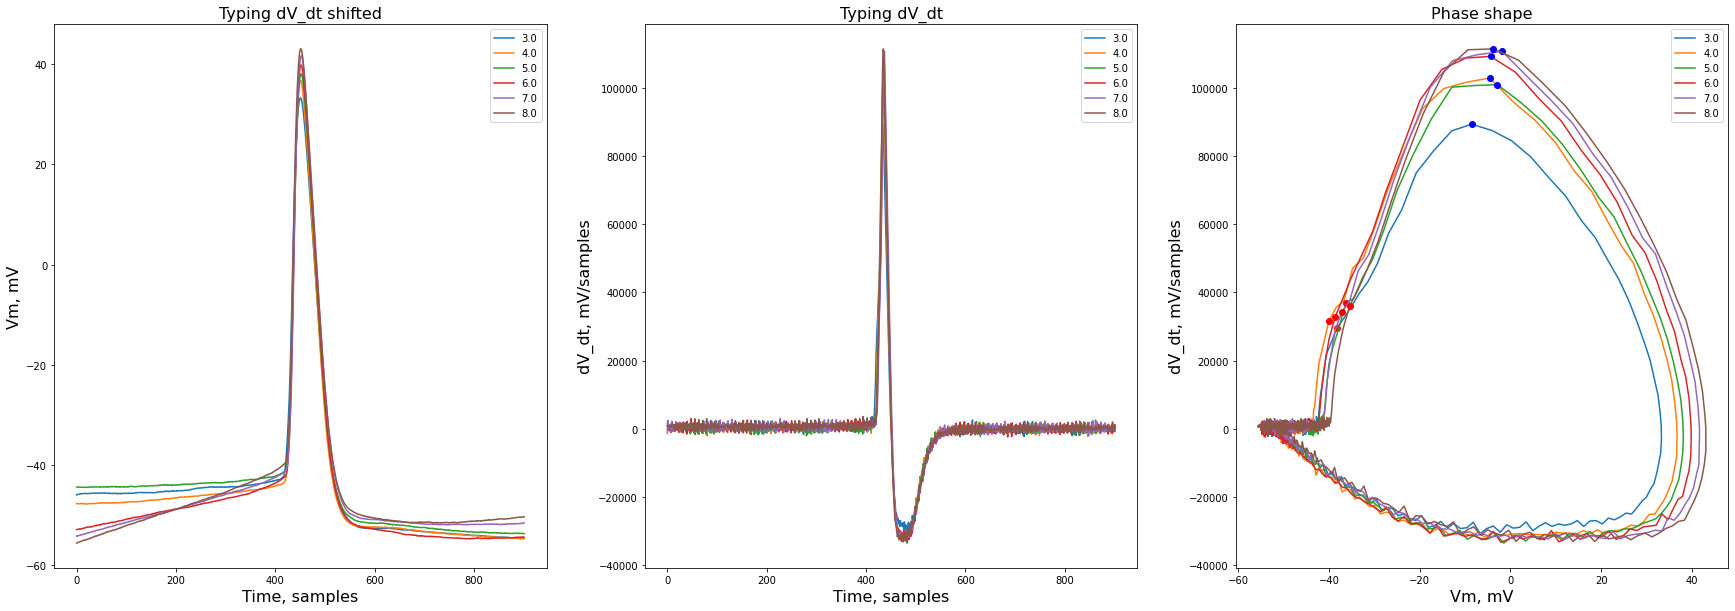

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(30,10))

for sweepNumber in Rh_df['Sweep']:
    offset = 100*sweepNumber
    #ax[0].plot(Vm["time"], Vm[sweepNumber]+offset, color='b')
    #ax[1].plot(Im["time"], Im[sweepNumber]+offset, color='k')
    yv= VmONE[sweepNumber]
    ydv= dV_dtONE[sweepNumber]
    sns.lineplot(ax=ax[0], data=VmONE, x=VmONE.index, y=sweepNumber, palette = "coolwarm", legend= 'full', label=sweepNumber)
    sns.lineplot(ax=ax[1], data=dV_dtONE, x=dV_dtONE.index, y=sweepNumber, palette = "coolwarm", legend= 'full', label=sweepNumber)
    ax[2].plot(yv, ydv, label=sweepNumber)
    ax[2].plot(VmONE[sweepNumber][dV_dtONE[sweepNumber].idxmax()], dV_dtONE[sweepNumber][dV_dtONE[sweepNumber].idxmax()], 'bo')
    ax[2].plot(Rh_df.loc[Rh_df['Sweep']==sweepNumber, 'KinkVm'].to_numpy(), dV_dtONE[sweepNumber][Rh_df.loc[Rh_df['Sweep']==sweepNumber, 'KinkVmIdx'].to_numpy()], 'ro')

ax[0].set_xlabel('Time, samples',size=16)
ax[0].set_ylabel('Vm, mV',size=16)
#ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Typing dV_dt shifted',size=16)
ax[0].legend( loc="best")

ax[1].set_xlabel('Time, samples',size=16)
ax[1].set_ylabel('dV_dt, mV/samples',size=16)
#ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Typing dV_dt',size=16)
ax[1].legend(loc="best")

ax[2].set_title('Phase shape',size=16)
ax[2].set_xlabel('Vm, mV',size=16)
ax[2].set_ylabel('dV_dt, mV/samples',size=16)
ax[2].legend(loc="best")

In [ ]:
#@title
Rh_df['shift'][Rh_df['Sweep']==4.0]
Rh_df.loc[Rh_df['Sweep']==4.0, 'shift'].to_numpy()
Rh_df.loc[1, 'shift']
Rh_df.index[Rh_df['Sweep']==4.0].to_numpy()
Rh_df.loc[Rh_df.index[Rh_df['Sweep']==4.0].to_numpy(), 'shift'].to_numpy()
float(Rh_df.loc[Rh_df['Sweep']==4.0, 'shift'].to_numpy())

-54.522701263427734

In [ ]:
Rh_df

,Sweep,PeakTime,PeakAmp,AP_idx,Im_Sweep,startpoint,endpoint,InOutDiff_sec,shift,b,Koef,KinkVm,KinkVmIdx
0,3.0,0.71400,33.270260,1.0,40.0,7998,8900,-0.00255,-53.582760,2075.195313,3294.930795,-38.250729,422
1,4.0,0.53160,36.706539,1.0,60.0,4350,5252,-0.00240,-54.522701,2075.195313,3430.316293,-39.990231,424
3,5.0,0.46465,38.092037,1.0,80.0,3010,3912,-0.00230,-53.649899,2075.195313,3309.300578,-36.328121,426
6,6.0,0.33820,39.837643,1.0,100.0,481,1383,-0.00235,-54.650875,2075.195312,3623.255202,-38.623043,426
11,7.0,0.32770,41.662594,1.0,120.0,271,1173,-0.00155,-54.217525,2075.195313,3523.110903,-37.127682,427
17,8.0,0.32270,43.048092,1.0,140.0,172,1074,-0.00180,-53.961178,2075.195312,3706.082684,-35.375973,426
